# Modelo de K-Means
## Jacobo P. Marín
#### Universidad Nacional Abierta y a Distancia
#### Dataset: Mall Customer Segmentation Data

### 1. Importación de Librerías y Datos

In [98]:
import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones
import plotly.graph_objs as go # Creación de gráficos en tres dimensiones
import plotly.express as px # Creación de gráficos en tres dimensiones

# librerías de para implementar modelo Kmeans
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

# librerías de para evaluar el modelo
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

#Librería para evitar la advertencia de que el modelo de KMeans tiene una pérdida de memoria en Windows 
import warnings
warnings.filterwarnings('ignore')

# Configuración para mostrar todas las columnas
pd.set_option('display.max_columns', None)

# Leer el dataset
df = pd.read_csv('Mall_Customers.csv')

# Mostrar las primeras filas
df.head(40)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [183]:
df.columns = df.columns.str.strip()
print("\nNombres de las columnas despues de limpiar en Mall_Customers:")
print(df.columns.tolist())


Nombres de las columnas despues de limpiar en Mall_Customers:
['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'group']


### 2. Análisis Exploratorio

In [226]:
#Estadisticas descriptivas
df.describe()

,Age,Annual Income (k$),Spending Score (1-100),group
count,184.000000,184.000000,184.000000,184.000000
mean,39.342391,64.260870,50.266304,1.978261
std,13.723147,24.036343,24.931595,1.467150
min,18.000000,21.000000,1.000000,0.000000
25%,29.000000,46.750000,35.000000,1.000000
50%,36.500000,63.000000,50.000000,2.000000
75%,49.000000,78.000000,69.500000,3.000000
max,70.000000,137.000000,98.000000,4.000000


In [228]:
#Informacion de columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 184 entries, 16 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     184 non-null    int64
 1   Annual Income (k$)      184 non-null    int64
 2   Spending Score (1-100)  184 non-null    int64
 3   group                   184 non-null    int32
dtypes: int32(1), int64(3)
memory usage: 6.5 KB


In [230]:
#Buscar valores nulos
df.isnull().sum()

Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
group                     0
dtype: int64

### 3. Preprocesamiento

In [233]:
# Verificar duplicados
print("\nNúmero de filas duplicadas:", df.duplicated().sum())

# Verificar valores nulos
print("\nValores nulos en el dataset:\n", df.isnull().sum())

print("\n")

#Revisión de datos faltantes
print("Cantidad de Registros con cero en Edad: ",df['Age'].isin([0]).sum())
print("Cantidad de Registros con cero en Salario: ",df['Annual Income (k$)'].isin([0]).sum())
print("Cantidad de Registros con cero en Data Credito: ",df['Spending Score (1-100)'].isin([0]).sum())


Número de filas duplicadas: 0

Valores nulos en el dataset:
 Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
group                     0
dtype: int64


Cantidad de Registros con cero en Edad:  0
Cantidad de Registros con cero en Salario:  0
Cantidad de Registros con cero en Data Credito:  0


In [235]:
# Reemplazar todos los ceros con el valor medio de la columna.

df['Age']=df['Age'].replace(0,df['Age'].mean())
df['Annual Income (k$)']=df['Annual Income (k$)'].replace(0,df['Annual Income (k$)'].mean())
df['Spending Score (1-100)']=df['Spending Score (1-100)'].replace(0,df['Spending Score (1-100)'].mean())

Text(0.5, 1.0, 'Identificacion de datos atipicos')

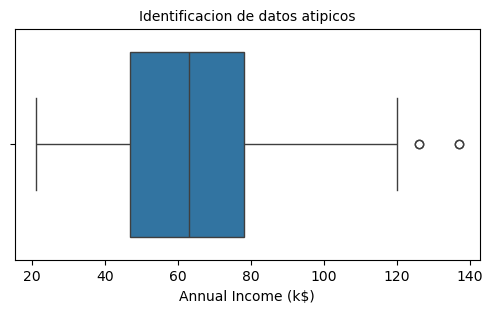

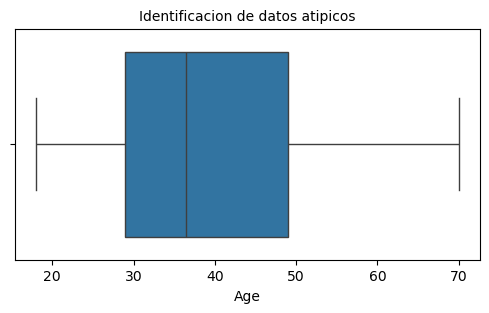

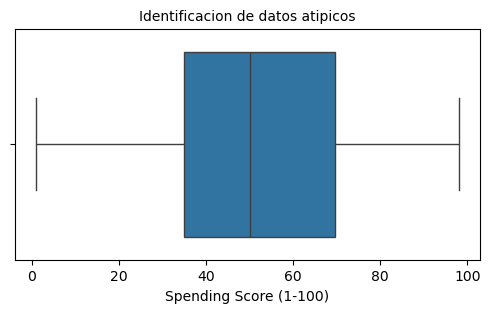

In [237]:
# Identificación de valores Atipicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=df['Annual Income (k$)'])
plt.title('Identificacion de datos atipicos', fontsize=10)

plt.figure(figsize=(6, 3))
sns.boxplot(x=df['Age'])
plt.title('Identificacion de datos atipicos', fontsize=10)

plt.figure(figsize=(6, 3))
sns.boxplot(x=df['Spending Score (1-100)'])
plt.title('Identificacion de datos atipicos', fontsize=10)

In [238]:
#Conteo de Datos Atipicos

nivel_min=20
nivel_max=140

Total_Atipicos=((df['Annual Income (k$)']<nivel_min)|(df['Annual Income (k$)']>nivel_max)).sum()
print("El total de datos atipicos en la variable Annual Income (k$) es {}".format(Total_Atipicos))

El total de datos atipicos en la variable Annual Income (k$) es 0


In [239]:
#Filtro de datos atipicos

df=df[(df['Annual Income (k$)']<nivel_max)&(df['Annual Income (k$)']>nivel_min)]

Total_Atipicos=((df['Annual Income (k$)']<nivel_min)|(df['Annual Income (k$)']>nivel_max)).sum()
print("El total de datos atipicos en la variable Annual Income (k$) es {}".format(Total_Atipicos))

El total de datos atipicos en la variable Annual Income (k$) es 0


In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 184 entries, 16 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     184 non-null    int64
 1   Annual Income (k$)      184 non-null    int64
 2   Spending Score (1-100)  184 non-null    int64
 3   group                   184 non-null    int32
dtypes: int32(1), int64(3)
memory usage: 6.5 KB


### 4. Selección de características. 

### Caracteristicas de interes seleccionadas
#### 1. Age
#### 2. Annual Income
#### 3. Spending Score

In [247]:
# Filtrar columnas del modelo 
df = df[["Age","Annual Income (k$)","Spending Score (1-100)"]]

# Filtrar columnas del modelo 
df.head(10)

,Age,Annual Income (k$),Spending Score (1-100)
16,35,21,35
17,20,21,66
18,52,23,29
19,35,23,98
20,35,24,35
21,25,24,73
22,46,25,5
23,31,25,73
24,54,28,14
25,29,28,82


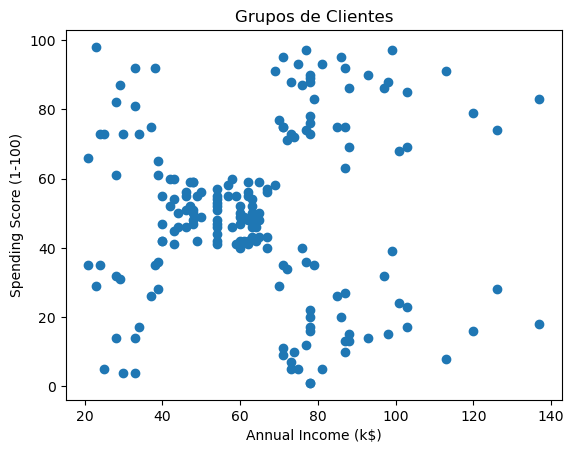

In [249]:
# Grafica antes del agrupamiento

plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Grupos de Clientes')
plt.show()

### 5. Entrenamiento del modelo

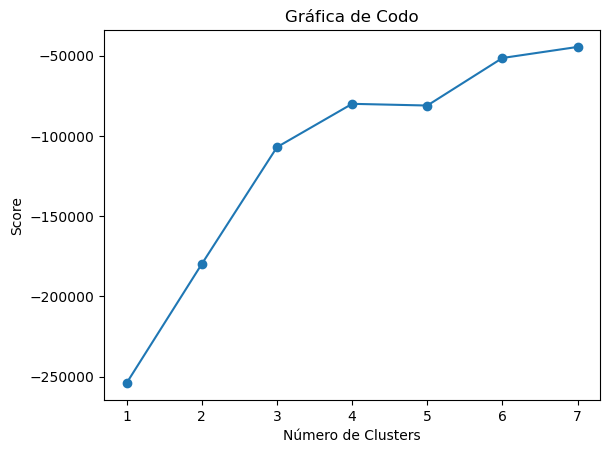

In [252]:
#Se realiza gráfica de codo para identificar valor de K

Nc = range(1, 8)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))]
score
plt.plot(Nc,score, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Score')
plt.title('Gráfica de Codo')
plt.show()

In [253]:
#Generacion del modelo de agrupamiento del modelo con k = 5

model = KMeans(n_clusters = 5, random_state = 0)
model.fit(df)

KMeans(n_clusters=5, random_state=0)

In [256]:
#Agregación de columna grupo al dataset

model.labels_
df["group"] = model.labels_
print (df)

     Age  Annual Income (k$)  Spending Score (1-100)  group
16    35                  21                      35      3
17    20                  21                      66      2
18    52                  23                      29      3
19    35                  23                      98      2
20    35                  24                      35      3
..   ...                 ...                     ...    ...
195   35                 120                      79      1
196   45                 126                      28      4
197   32                 126                      74      1
198   32                 137                      18      4
199   30                 137                      83      1

[184 rows x 4 columns]


### 6. Evaluación

In [259]:
#Evaluación de desempeño con el coeficiente de Silhouette, el indice de Calinski-Harabasz y el indice de Davies Bouldin Score

# Preparación de la metrica de la columna Grupo
Observaciones = len(df)
X = df.drop('group', axis=1)
clusters = df['group']

# Se calculan las métricas
sil_score = silhouette_score(X, clusters)
calinski_score = calinski_harabasz_score(X, clusters)
davies_score = davies_bouldin_score(X, clusters)

# Se crea una tabla para mostrar los valores de las métricas
table_data = [
    ["Numero de Observaciones", Observaciones],
    ["Coeficiente Silhouette", sil_score],
    ["Indice Calinski Harabasz", calinski_score],
    ["Indice Davies Bouldin", davies_score]
]

# Imprime la tabla
from tabulate import tabulate
print(tabulate(table_data, headers=["Metric", "Value"], tablefmt='pretty'))

+--------------------------+---------------------+
|          Metric          |        Value        |
+--------------------------+---------------------+
| Numero de Observaciones  |         184         |
|  Coeficiente Silhouette  | 0.38717027606789733 |
| Indice Calinski Harabasz | 118.67828624696067  |
|  Indice Davies Bouldin   |  1.035231503738784  |
+--------------------------+---------------------+


### 7. Visualizacion de resultados

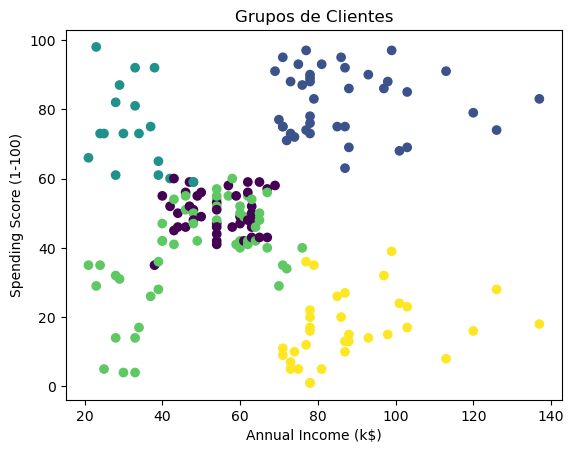

In [261]:
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c = df['group'], cmap = 'viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Grupos de Clientes')
plt.show()

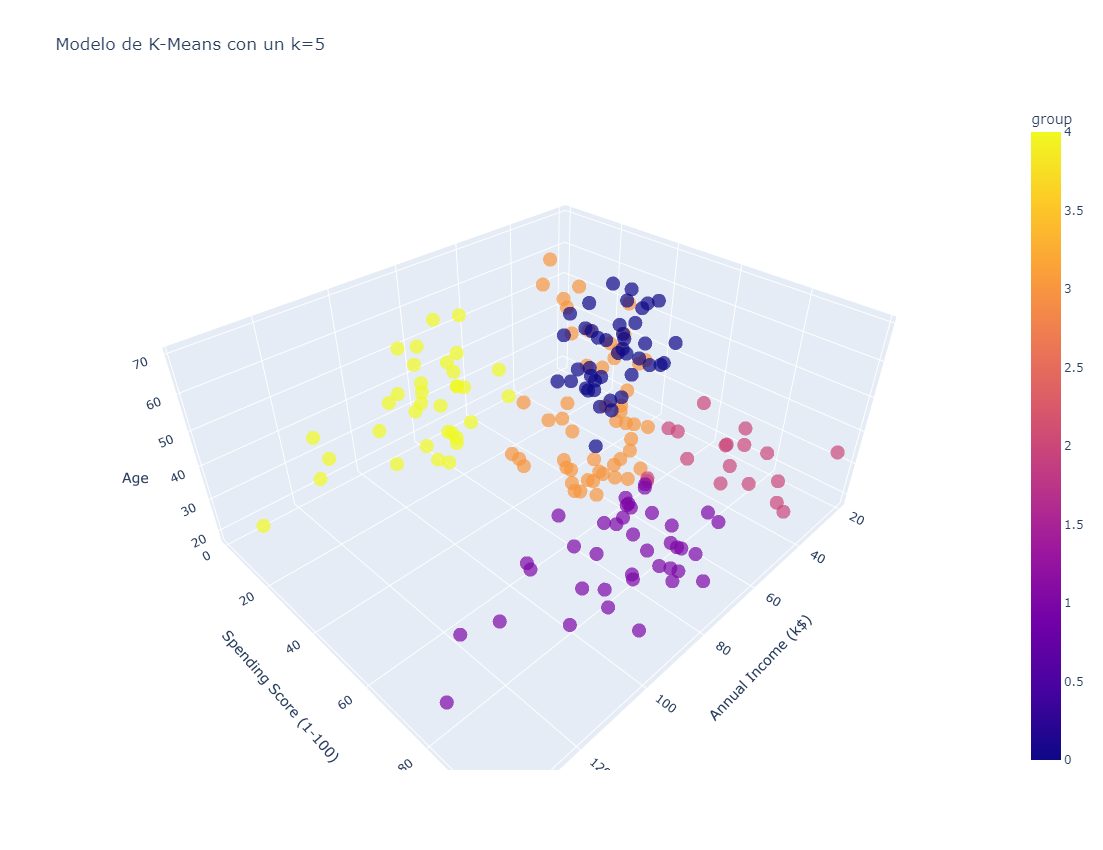

In [223]:
# Crear un modelo 3D de los datos agrupados

Grafica_3D = px.scatter_3d(df, x='Annual Income (k$)', y='Spending Score (1-100)', z='Age', color='group', symbol='group', symbol_map={0: 'circle', 1: 'circle', 2: 'circle', 3: 'circle', 4: 'circle', 5: 'circle'}, opacity=0.7, width=900, height=850, title=f'Modelo de K-Means con un k={5}', labels={'label': 'Cluster'}, color_discrete_map={})
Grafica_3D.update_layout(showlegend=False) 